In [73]:
#1. Import the required libraries and read the dataset. (1 point)


In [74]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

In [75]:
#2. Check the first few samples, shape, info of the data and try to familiarize
#yourself with different features. (2 points)

In [76]:
df=pd.read_csv("TelcomCustomer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [78]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [79]:
## numerical columns
num_df=df_new.select_dtypes(include=['int64','int','float'])
num_df.shape

(7032, 20)

In [80]:
## categorical columns
num_df=df_new.select_dtypes(include=['O'])
num_df.shape

(7032, 0)

In [81]:
## Lets check basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
# 3. Check the percentage of missing values in each column of the data frame. 
#Drop the missing values if there are any (2 points)
df.isnull().sum()/len(df)*100
 # df.isnull().sum()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [83]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [84]:
# There are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

In [85]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [86]:
# 3. Check the percentage of missing values in each column of the data frame. 
#Drop the missing values if there are any (2 points)
df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [87]:
#Count of null values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [88]:
#4. Check if there are any duplicate records in the dataset? If any drop them (2)
len(df[df.duplicated()])

0

In [89]:
# 5.Drop the columns which you think redundant for the analysis (2 points)
df=df.drop(columns=['customerID'],axis=1)


In [90]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df_new = df.copy()

In [92]:
#6. Encode the categorical variables (2 points)
cate=['gender', 'Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity',
      'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
lbl_encode = LabelEncoder()
for i in cate:
    df_new[i]=df_new[[i]].apply(lbl_encode.fit_transform)

In [93]:
df_new.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [94]:
#7.Perform a detailed univariate, bivariate, and multivariate analysis with
#appropriate plots and add detailed comments after each analysis. (8 points)
df.axes

[Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042],
            dtype='int64', length=7032),
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object')]

In [95]:
df_new.select_dtypes(include=np.number).describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,31.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,54.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,71.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [96]:
#7. Perform a detailed univariate, bivariate, and multivariate analysis with
#appropriate plots and add detailed comments after each analysis. (8 points)

<AxesSubplot:>

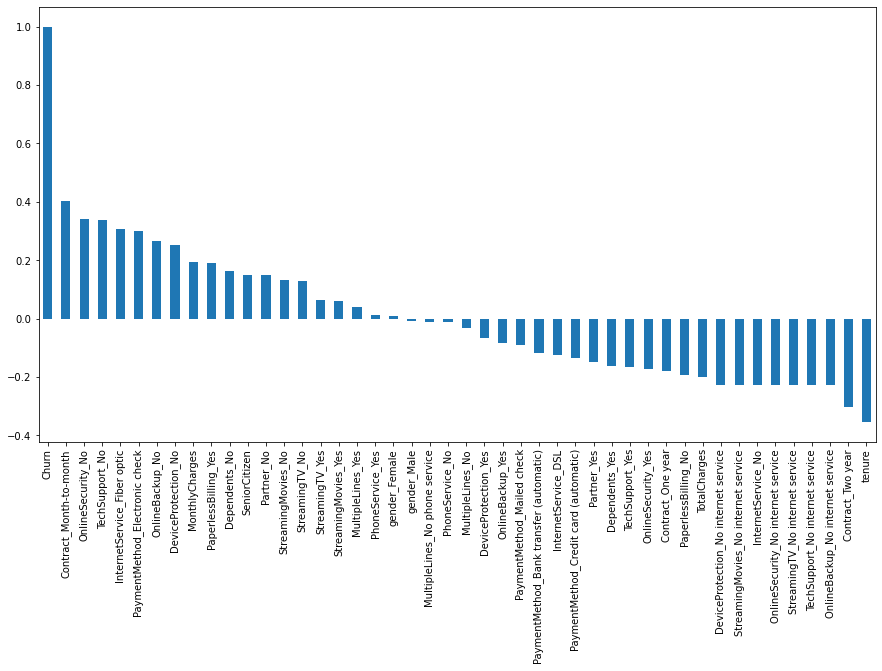

In [97]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [98]:
# From the chart we can conclude that, Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. 
# While, tenure, two year contracts seem to be negatively correlated with churn.
# Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. 
# without internet connection seem to be negatively related to churn.
# We will explore the patterns for the above correlations below before we delve into modelling and 
# identifying the important variables.

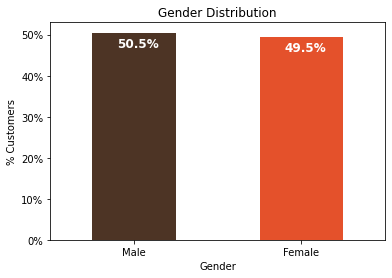

In [99]:
# Gender Distribution - About half of the customers in our data set are male while the other half are female
import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                   stacked = True,
                                                                   rot = 0,
                                                                   color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

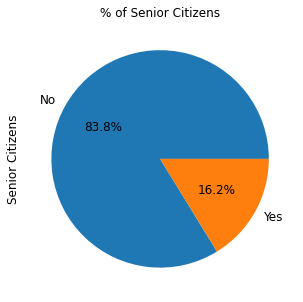

In [100]:
#% Senior Citizens - There are only 16% of the customers who are senior citizens. 
# Thus most of our customers in the data are younger people.
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

In [101]:
#Partner and dependent status - About 50% of the customers have a partner,
# while only 30% of the total customers have dependents.
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3427','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


KeyError: "The following 'id_vars' are not present in the DataFrame: ['customerID']"

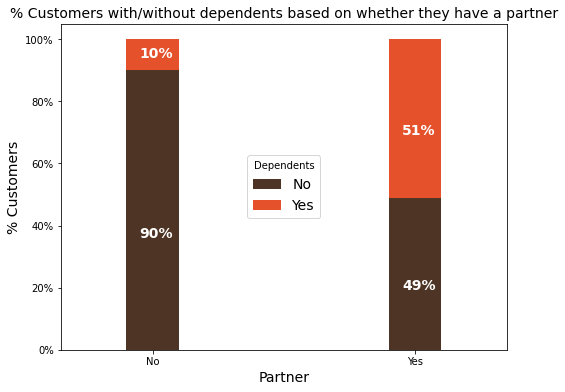

In [102]:
#Interestingly, among the customers who have a partner, only about half of them also have a dependent,
# while other half do not have any independents. Additionally, as expected, among the customers who do not have any partner,
#a majority (80%) of them do not have any dependents .
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

In [103]:
#I also looked at any differences between the % of customers with/without dependents and partners by gender.
#There is no difference in their distribution by gender. 
#Additionally, there is no difference in senior citizen status by gender.

In [104]:
# BIVARAIATE ANALYSIS

In [105]:
# Tenure: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, 
# while quite a many are there for about 72 months. 
#This could be potentially because different customers have different contracts.
#Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

Text(0.5, 1.0, '# of Customers by their tenure')

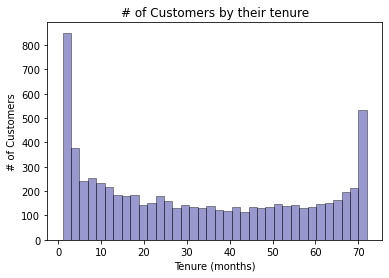

In [106]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

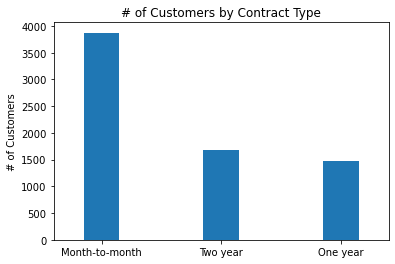

In [107]:
# Contracts: To understand the above graph, lets first look at the # of customers by different contracts.
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

In [108]:
#As we can see from this graph most of the customers are in the month to month contract. 
# While there are equal number of customers in the 1 year and 2 year contracts.

Text(0.5, 1.0, 'Two Year Contract')

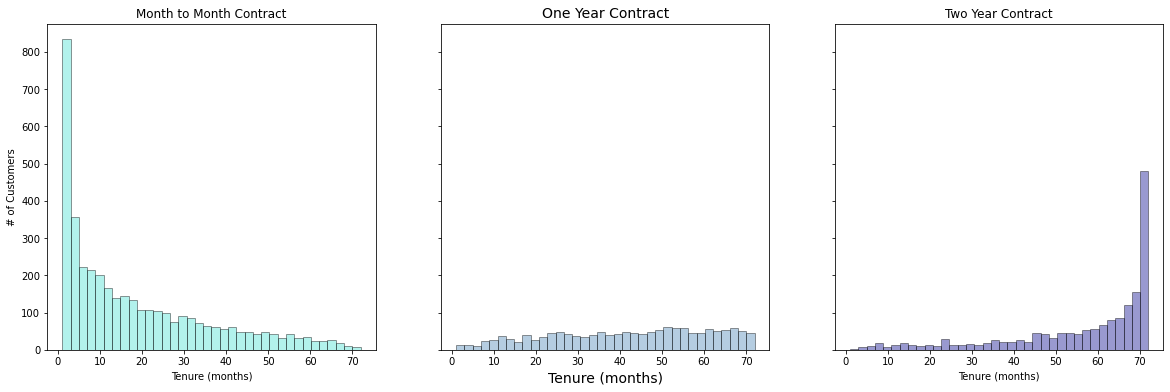

In [109]:
#Tenure of customers based on their contract type.
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

In [110]:
# Interestingly most of the monthly contracts last for 1-2 months, 
# while the 2 year contracts tend to last for about 70 months. 
# This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

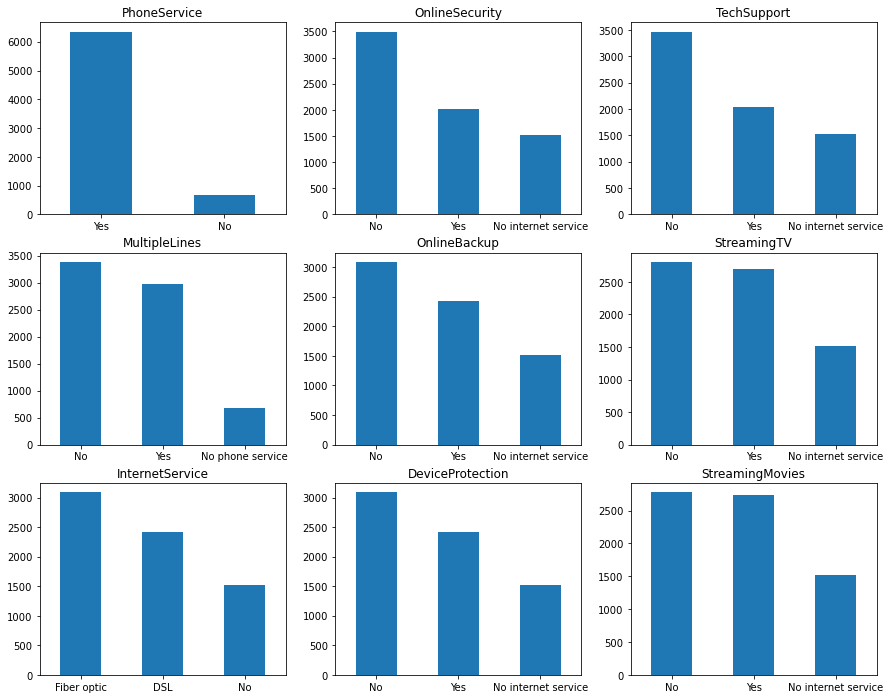

In [111]:
# distribution of various services used by customers
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

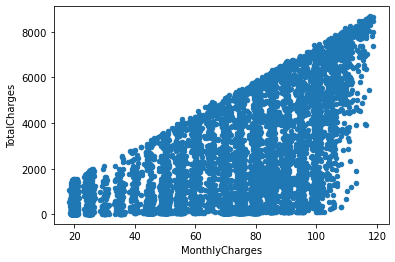

In [112]:
# Relation between monthly and total charges
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')


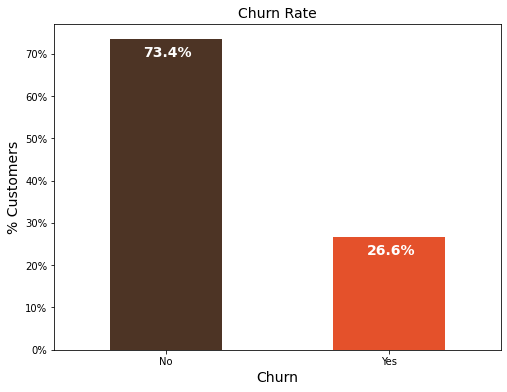

In [113]:
# predictor variable (Churn) and understand its interaction with other important variables
# as was found out in the correlation plot.
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                  stacked = True,
                                                                  rot = 0,
                                                                  color = colors,
                                                                  figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [114]:
#In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority 
#of the customers to not churn. This is important to keep in mind for our modelling as skeweness 
#could lead to a lot of false negatives.
#We will see in the modelling section on how to avoid skewness in the data.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

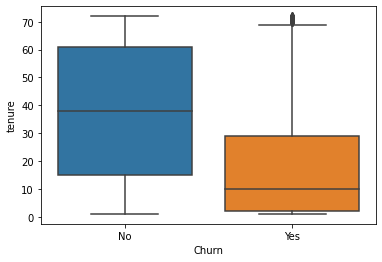

In [115]:
#Churn vs Tenure: 
#As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure
# with the telecom company.
sns.boxplot(x = df.Churn, y = df.tenure)

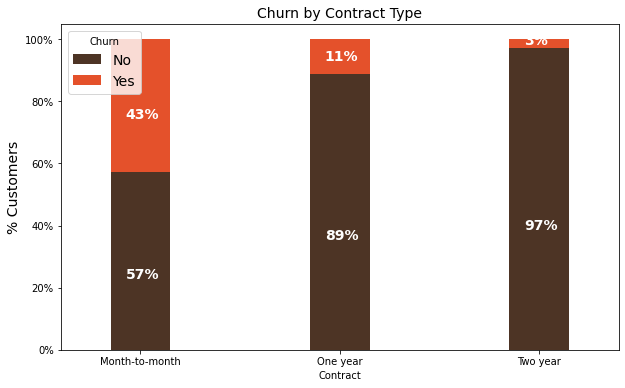

In [116]:
#Churn by Contract Type: Similar to what we saw in the correlation plot, 
#the customers who have a month to month contract have a very high churn rate.
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

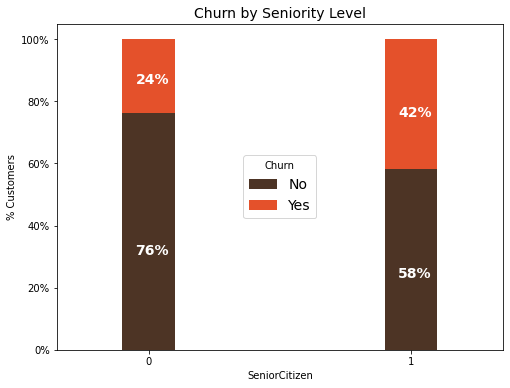

In [117]:
# Churn by Seniority: Senior Citizens have almost double the churn rate than younger population.
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

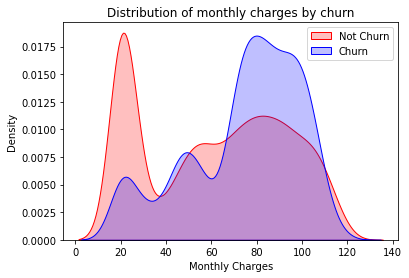

In [118]:
#Churn by Monthly Charges: Higher % of customers churn when the monthly charges are high.
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Text(0.5, 1.0, 'Distribution of total charges by churn')

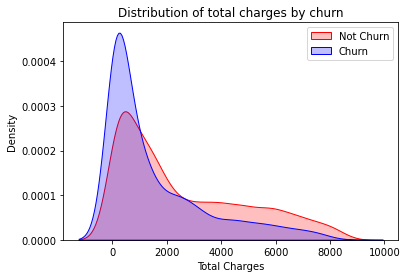

In [119]:
# Churn by Total Charges: It seems that there is higer churn when the total charges are lower.
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

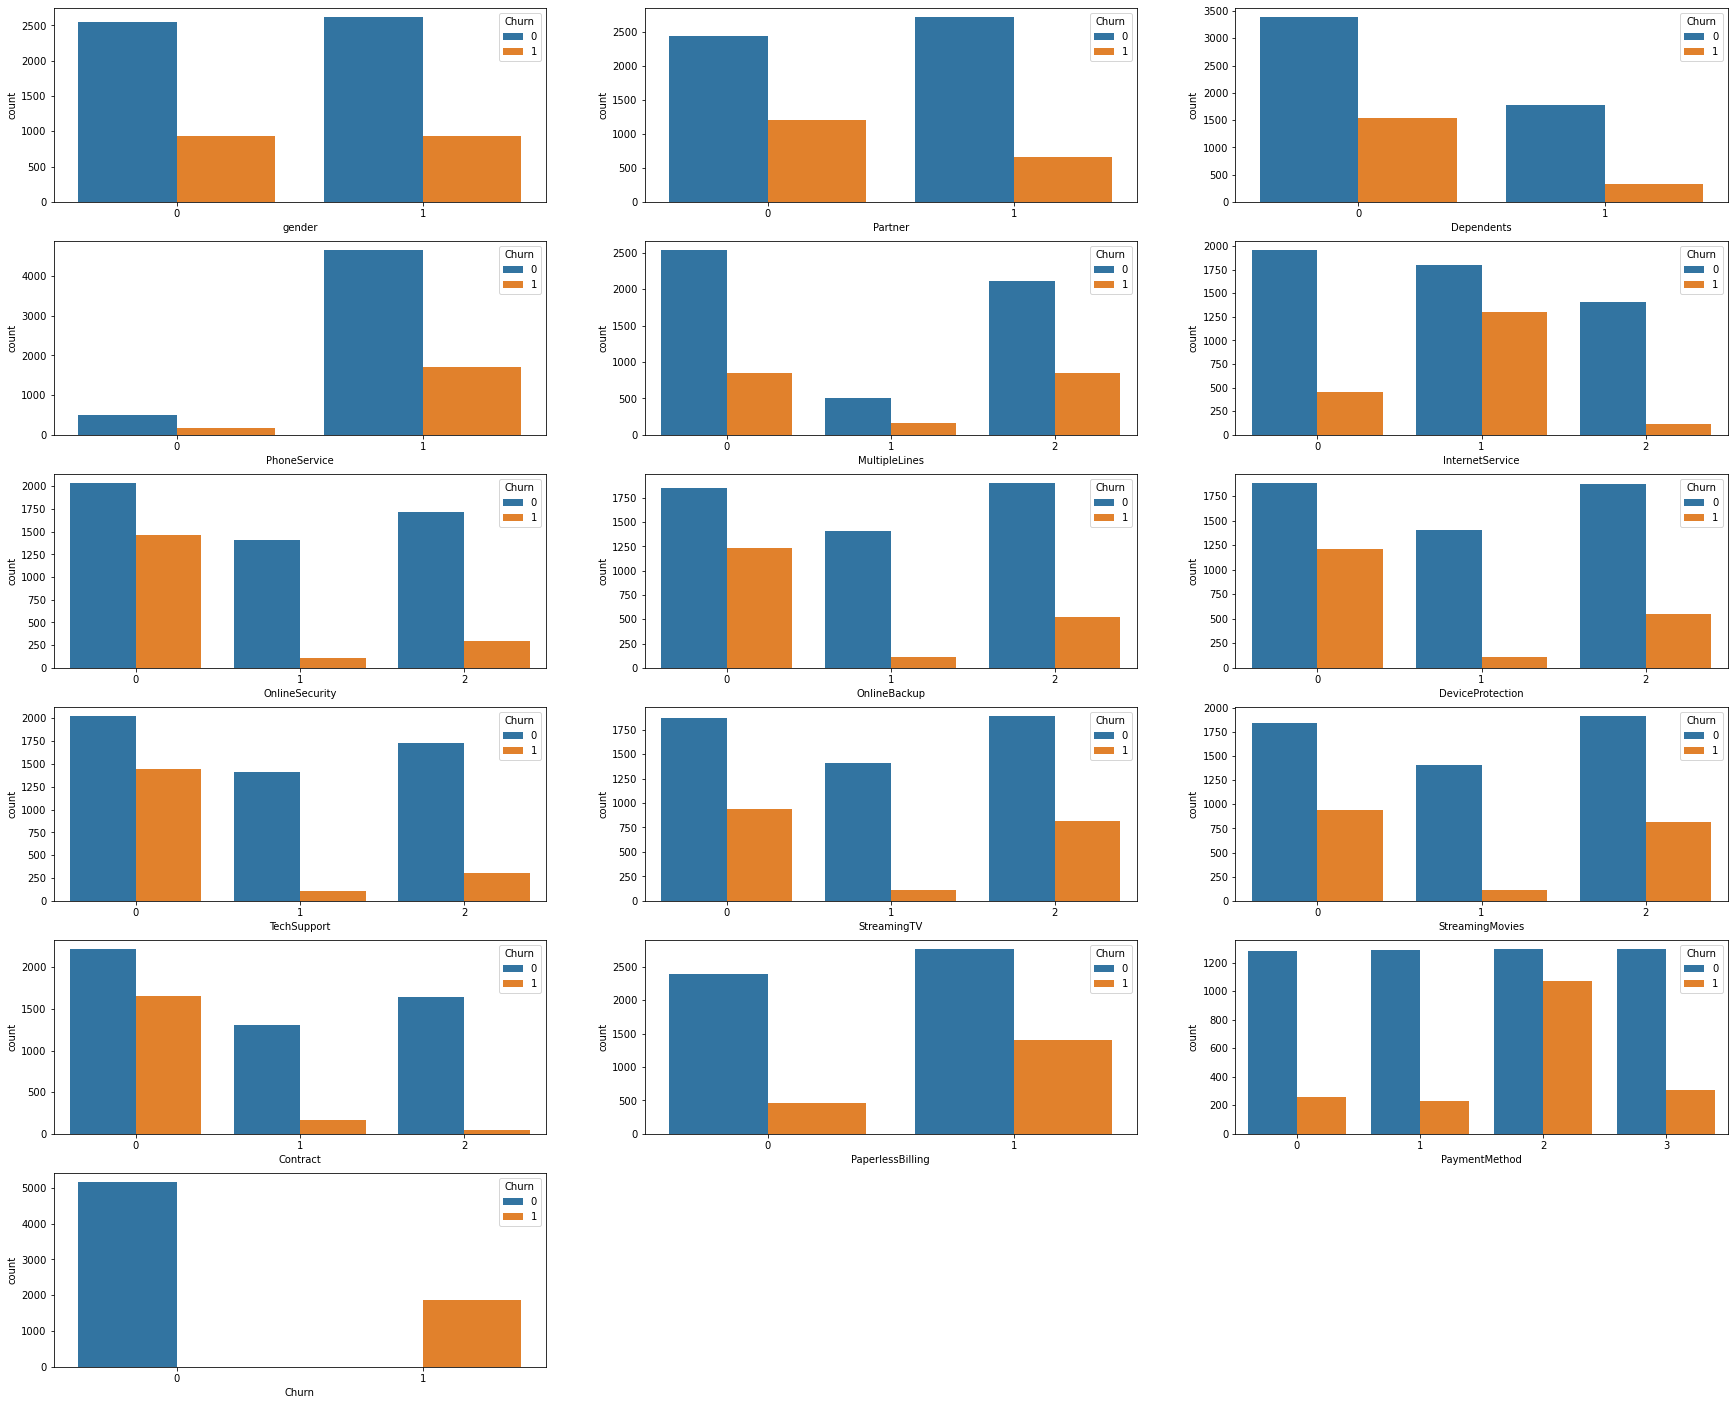

In [121]:
# Count plot for various features and churn variable
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns
i=1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='Churn', data=df_new)
    i +=1

In [ ]:
# Multivariate Analysis

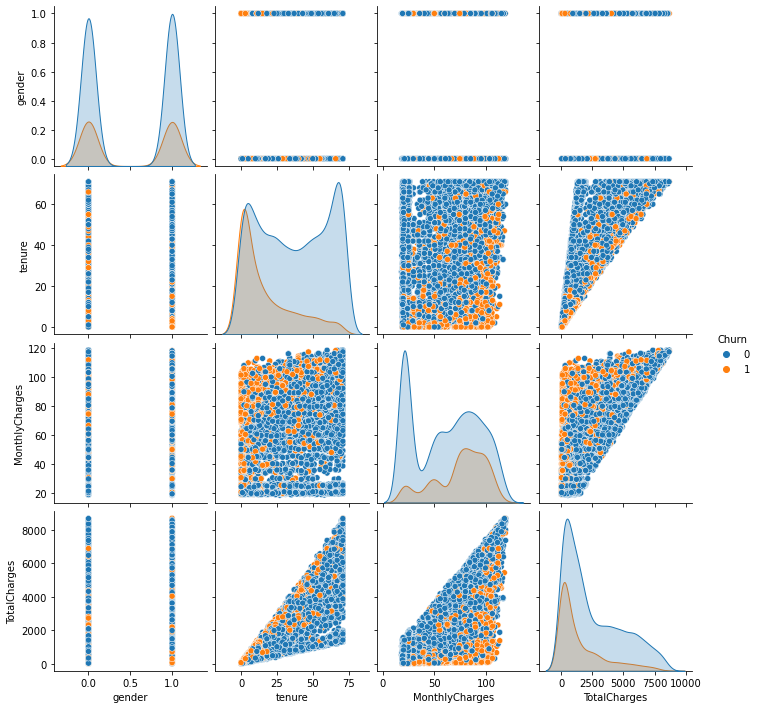

In [131]:
#Let us visualize and understand the relationship between the multiple pairs of variables throughout for churns using pairplot
df_pairplot = df_new[['gender', 'tenure','MonthlyCharges','TotalCharges','Churn']]
sns.pairplot(df_pairplot,hue='Churn')
plt.show()

In [ ]:
# We can observe the below points from the above pair plot
# 1. Genders male and female are almost equal in leaving the network(churn) with respect to total charges/ monthly charges increases 
# 1. When the tenure increases with monthly charges, churn has increased, more number of people started leaving the network
# 2. Tenure, two year contracts seem to be negatively correlated with churn.
# 3. When monthy charges increases with total charges, more customers had chances of leaving the network
# 4. When the tenure increases with total charges increases but number of customers reduced leaving the network

In [134]:
# 8. Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable (2 points)
X = df_new.drop('Churn',axis=1)
y = df_new['Churn']
df_new.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [135]:
#9. Split the dataset into two parts (i.e. 70% train and 30% test) (2 points)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print ("y_test: ", y_test.shape)

X_train:  (4922, 19)
y_train:  (4922,)
X_test:  (2110, 19)
y_test:  (2110,)


In [136]:
#10. Standardize the columns using z-score scaling approach (2 points) - standardscaler method  
df1 = df_new.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.062666,-1.183614,-0.917837,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,-1.161694,-0.994194,-0.601663
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.991564,-1.183614,1.408012,-1.028998,1.245441,-0.924267,-1.112632,-1.121501,0.373926,-1.206361,1.336636,-0.260878,-0.173740,-0.601663
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,-1.183614,1.408012,1.242875,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,1.336636,-0.363923,-0.959649,1.662059
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.062666,-1.183614,1.408012,-1.028998,1.245441,1.396963,-1.112632,-1.121501,0.373926,-1.206361,-1.473857,-0.747850,-0.195248,-0.601663
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.991564,0.172835,-0.917837,-1.028998,-1.026988,-0.924267,-1.112632,-1.121501,-0.826735,0.828939,0.399805,0.196178,-0.940457,1.662059


In [137]:
#Another approach -  apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df_new.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_telecom_standardized = z_score(df)

df_telecom_standardized

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009358,-0.440296,1.035543,-0.652259,-1.280157,-3.056117,0.062662,-1.183530,-0.917772,1.242786,-1.026915,-0.924201,-1.112553,-1.121422,-0.826676,0.828880,0.399777,-1.161611,-0.994123,-0.601621
1,0.990588,-0.440296,-0.965539,-0.652259,0.064298,0.327166,-0.991493,-1.183530,1.407912,-1.028925,1.245352,-0.924201,-1.112553,-1.121422,0.373899,-1.206275,1.336541,-0.260859,-0.173727,-0.601621
2,0.990588,-0.440296,-0.965539,-0.652259,-1.239416,0.327166,-0.991493,-1.183530,1.407912,1.242786,-1.026915,-0.924201,-1.112553,-1.121422,-0.826676,0.828880,1.336541,-0.363897,-0.959581,1.661941
3,0.990588,-0.440296,-0.965539,-0.652259,0.512450,-3.056117,0.062662,-1.183530,1.407912,-1.028925,1.245352,1.396864,-1.112553,-1.121422,0.373899,-1.206275,-1.473752,-0.747797,-0.195234,-0.601621
4,-1.009358,-0.440296,-0.965539,-0.652259,-1.239416,0.327166,-0.991493,0.172823,-0.917772,-1.028925,-1.026915,-0.924201,-1.112553,-1.121422,-0.826676,0.828880,0.399777,0.196164,-0.940391,1.661941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990588,-0.440296,1.035543,1.532916,-0.343113,0.327166,1.116816,-1.183530,1.407912,-1.028925,1.245352,1.396864,1.146607,1.137483,0.373899,0.828880,1.336541,0.664821,-0.129171,-0.601621
7039,-1.009358,-0.440296,1.035543,1.532916,1.612459,0.327166,1.116816,0.172823,-0.917772,1.242786,1.245352,-0.924201,1.146607,1.137483,0.373899,0.828880,-0.536988,1.276402,2.240896,-0.601621
7040,-1.009358,-0.440296,1.035543,1.532916,-0.872746,-3.056117,0.062662,-1.183530,1.407912,-1.028925,-1.026915,-0.924201,-1.112553,-1.121422,-0.826676,0.828880,0.399777,-1.169921,-0.854453,-0.601621
7041,0.990588,2.270878,1.035543,-0.652259,-1.157934,0.327166,1.116816,0.172823,-0.917772,-1.028925,-1.026915,-0.924201,-1.112553,-1.121422,-0.826676,0.828880,1.336541,0.319145,-0.872033,1.661941


In [142]:
#11. Write a function. (8 points)
#i) Which can take the model and data as inputs. ii) Fit the model with the train data.
#iii) Make predictions on the test set.
#iv) Returns the Accuracy Score.
def fit_n_print(model, X_train , X_test, y_train, y_test): # take the model, and data as inputs
    
    model.fit(X_train, y_train) # fits the model with the train data
    
    pred = model.predict(X_test) # makes predictions on the test set
    
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy # return all the metrics    

In [143]:
#12. Use the function and train a Logistic regression, 
#KNN, and Naive Bayes, Decision tree, Random forest, Boosting and Stacking Classifier models 
#and make predictions on test data. (8 points)

## Initializing the models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn),('gb', gb),('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [144]:
#13. Display and compare all the models designed with their test accuracies.(4)
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc],
                            ['Logistic Regression', 'Naive Bayes', 'KNN', 'Decision tree',
                             'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [145]:
result

,Accuracy
Logistic Regression,0.791943
Naive Bayes,0.754976
KNN,0.768246
Decision tree,0.727488
Random Forest,0.790521
Ada Boost,0.800948
Gradient Boost,0.801896
Stacking,0.786256


In [146]:
#Conclusion

#From the above example, we can see that SVM, Logistic Regression and Random Forest performed 
# better than Decision Tree for customer churn analysis for this dataset. 

#The following things can be observed from the dataset:

#1. Attributes and features such as tenure group,Contract, Paperless Billing, Monthly Charges and
# Internet Service appear to play a role in customer churn.
# 2. There seems to be no relationship between the gender and the churn rate.
# 3. Customers having a service plan of month-tomonth contract, with Paperless Billing and are within 12 months
# tenure, are more likely to churn.
# 4. On the other hand, customers with one- or two year contract, with longer than 12 months tenure,that are not
# using Paperless Billing, are less likely to churn.
# 5. Electronic check mediums are the highest churners
# 6. Contract Type – Monthly customers are more likely to churn because of no contract terms, 
# as they are free-to-go customers.
# 7.  No Online security, No Tech Support category are high churners
# 8. Non-senior Citizens are high churners